In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error
import math
import time

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/hnei-dataset/HNEI_1.csv")

In [3]:
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
1071,1109,928.00,247.178571,3.810,3.709,1232.250,1844.25,7071.31,4
1072,1110,925.25,246.000000,3.808,3.707,1232.250,1844.25,6985.12,3
1073,1111,920.25,243.750000,3.807,3.708,1227.875,1844.38,6994.44,2
1074,1112,906.94,233.969000,3.795,3.825,854.375,1582.00,7776.75,1


In [4]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [5]:
df.tail()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
1071,1109,928.00,247.178571,3.810,3.709,1232.250,1844.25,7071.31,4
1072,1110,925.25,246.000000,3.808,3.707,1232.250,1844.25,6985.12,3
1073,1111,920.25,243.750000,3.807,3.708,1227.875,1844.38,6994.44,2
1074,1112,906.94,233.969000,3.795,3.825,854.375,1582.00,7776.75,1
1075,1113,679307.97,283252.125000,4.216,3.256,51869.984,604521.09,604521.09,0


Data Preprocessing

In [6]:
#Data Preprocessing

In [7]:
df.isnull().sum() 

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [8]:
df.shape

(1076, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                1076 non-null   int64  
 1   Discharge Time (s)         1076 non-null   float64
 2   Decrement 3.6-3.4V (s)     1076 non-null   float64
 3   Max. Voltage Dischar. (V)  1076 non-null   float64
 4   Min. Voltage Charg. (V)    1076 non-null   float64
 5   Time at 4.15V (s)          1076 non-null   float64
 6   Time constant current (s)  1076 non-null   float64
 7   Charging time (s)          1076 non-null   float64
 8   RUL                        1076 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 75.8 KB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

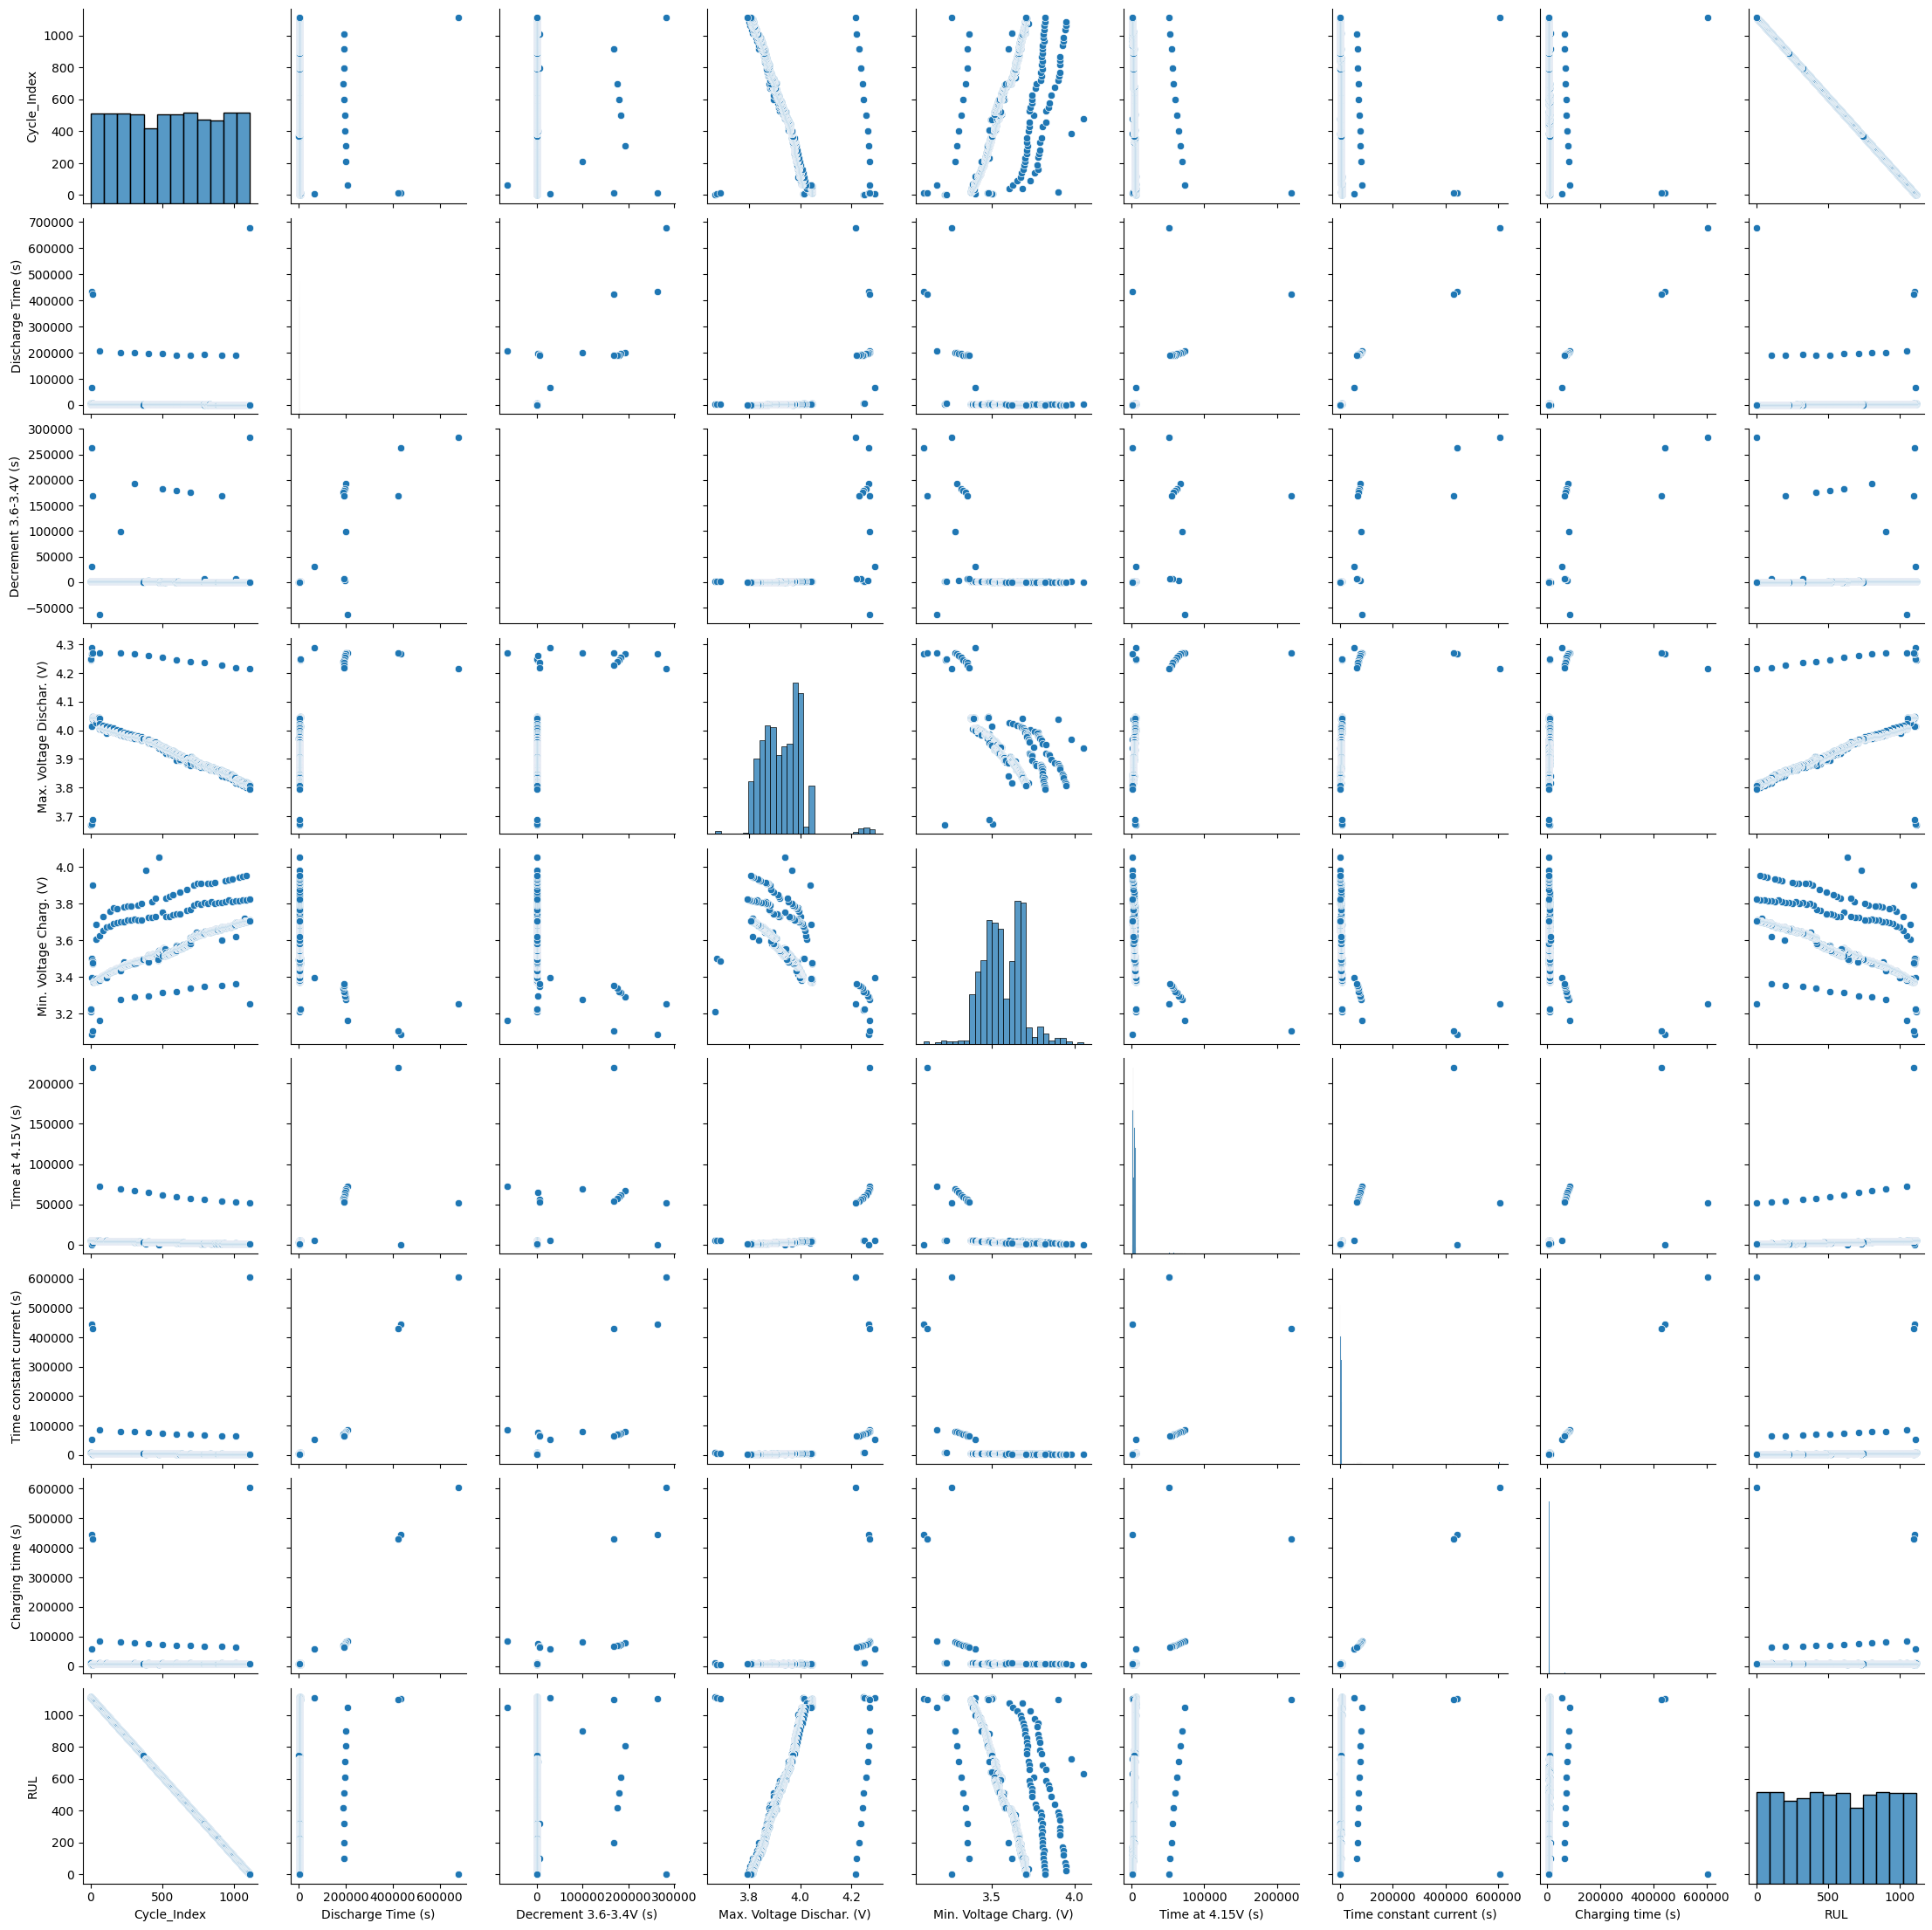

In [10]:
sns.pairplot(df)

In [11]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,1076.000000,1076.000000,1076.00000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000
mean,556.878253,4899.191143,2062.10433,3.929328,3.566317,3863.478884,5972.033439,10089.222221,556.121747
std,323.594005,33317.514216,18051.02485,0.077341,0.121406,8892.439128,27000.077287,26671.212644,323.594005
min,1.000000,168.000000,-64192.71600,3.670000,3.086000,269.984000,1124.350000,5277.630000,0.000000
25%,271.750000,1195.347500,332.00000,3.869000,3.478000,1864.884179,2636.337500,7473.617500,276.750000
50%,559.500000,1617.405000,474.00000,3.928000,3.554000,3133.732000,4004.420000,8197.250000,553.500000
75%,836.250000,1934.392500,628.20000,3.982000,3.661000,4166.264000,5084.350000,8590.460000,841.250000
max,1113.000000,679307.970000,283252.12500,4.290000,4.053000,219923.996000,604521.090000,604521.090000,1112.000000


In [12]:
df.corr()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
Cycle_Index,1.000000,-0.026390,-0.018755,-0.834406,0.788782,-0.169132,-0.067432,-0.039749,-1.000000
Discharge Time (s),-0.026390,1.000000,0.856287,0.419499,-0.270018,0.737750,0.939110,0.935240,0.026390
Decrement 3.6-3.4V (s),-0.018755,0.856287,1.000000,0.366848,-0.228063,0.594238,0.800162,0.796521,0.018755
Max. Voltage Dischar. (V),-0.834406,0.419499,0.366848,1.000000,-0.793998,0.484733,0.354260,0.328032,0.834406
Min. Voltage Charg. (V),0.788782,-0.270018,-0.228063,-0.793998,1.000000,-0.343670,-0.262197,-0.237835,-0.788782
Time at 4.15V (s),-0.169132,0.737750,0.594238,0.484733,-0.343670,1.000000,0.625528,0.615712,0.169132
Time constant current (s),-0.067432,0.939110,0.800162,0.354260,-0.262197,0.625528,1.000000,0.999452,0.067432
Charging time (s),-0.039749,0.935240,0.796521,0.328032,-0.237835,0.615712,0.999452,1.000000,0.039749
RUL,-1.000000,0.026390,0.018755,0.834406,-0.788782,0.169132,0.067432,0.039749,1.000000


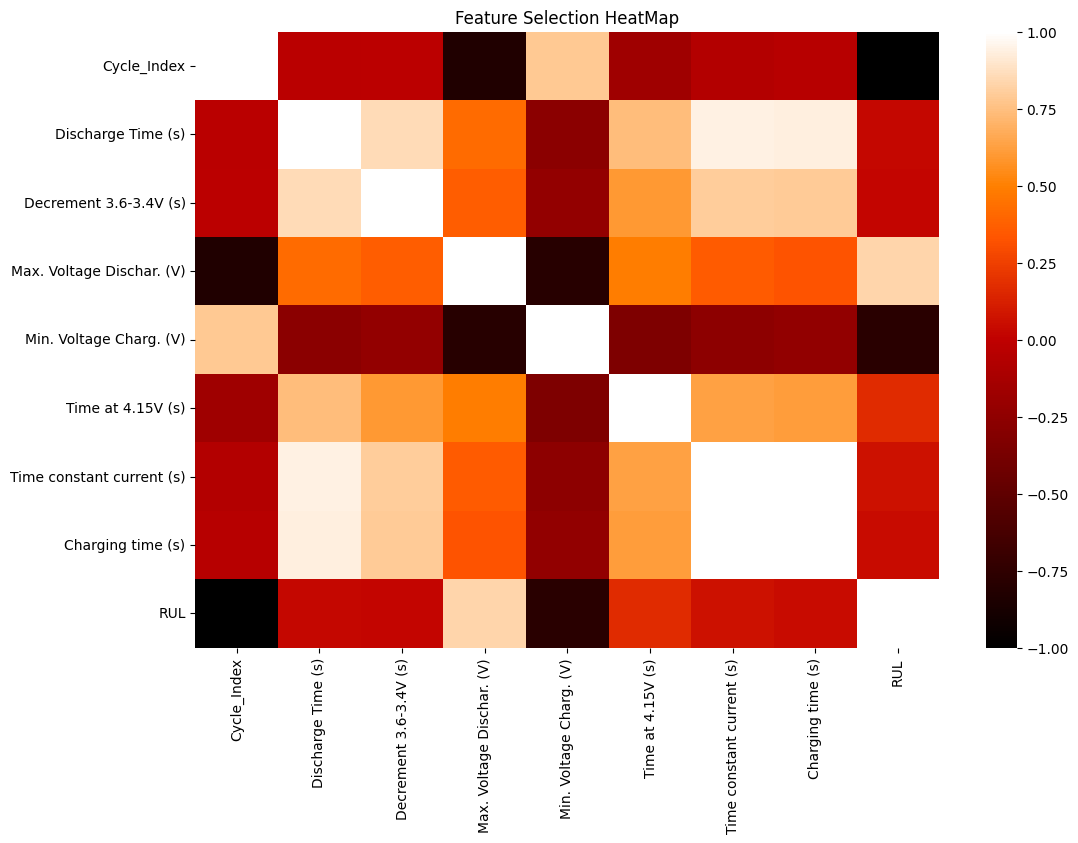

In [13]:
# Feature Extraction
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='gist_heat')
plt.title('Feature Selection HeatMap')
plt.show()

In [14]:
# Splitting Training and Testing Data
x = df[['Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Cycle_Index']]
y = df['RUL']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [16]:
# Standardize input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
# SVR with linear kernel
start_time = time.time()
model_linear = SVR(kernel='linear', C=250,epsilon=0.5, tol=50)
model_linear.fit(x_train_scaled, y_train)
predict_linear = model_linear.predict(x_test_scaled)
linear_train_time = time.time() - start_time

In [18]:
start_time = time.time()
linear_predict = model_linear.predict(x_test_scaled)
linear_predict_time = time.time() - start_time

In [19]:
# SVR with radial basis function (RBF) kernel
start_time = time.time()
model_rbf = SVR(kernel='rbf',gamma="scale",C=1200,epsilon=0.1)
model_rbf.fit(x_train_scaled, y_train)
predict_rbf = model_rbf.predict(x_test_scaled)
rbf_train_time = time.time() - start_time

In [20]:
start_time = time.time()
rbf_predict = model_rbf.predict(x_test_scaled)
rbf_predict_time = time.time() - start_time

In [21]:
# mlp_model = MLPRegressor(
#     hidden_layer_sizes=(250, 800,100),  # Adjusted the number of neurons and layers
#     activation='tanh',
#     solver='sgd',
#     max_iter=1000,  # Increased the number of iterations
#     alpha=0.0001,  # Adjusted the regularization strength
#     random_state=42,
#     learning_rate='constant',
#     learning_rate_init=0.01,  # Adjusted the learning rate
#     tol=1e-5,  # Adjusted the tolerance
#     momentum=0.9,
#     nesterovs_momentum=True,
#     early_stopping=False,
#     validation_fraction=0.1,
#     beta_1=0.9,
#     #beta_2=0.999,
#     epsilon=1e-8
# )
# mlp_model.fit(x_train_scaled, y_train)
# mlp_predict = mlp_model.predict(x_test_scaled)
# mlp_train_time = time.time() - start_time


In [22]:
# MLP Model
start_time = time.time()
mlp_model = MLPRegressor(hidden_layer_sizes=(250, 800), activation='relu', solver='adam', max_iter=1000, alpha=0.1, random_state=42)
mlp_model.fit(x_train_scaled, y_train)
mlp_predict = mlp_model.predict(x_test_scaled)
mlp_train_time = time.time() - start_time

In [23]:
start_time = time.time()
mlp_predict = mlp_model.predict(x_test_scaled)
mlp_predict_time = time.time() - start_time

In [24]:
# Evaluate models
linear_mse = mean_squared_error(y_test, predict_linear)
linear_r2 = r2_score(y_test, predict_linear)

rbf_mse = mean_squared_error(y_test, predict_rbf)
rbf_r2 = r2_score(y_test, predict_rbf)

mlp_mse = mean_squared_error(y_test, mlp_predict)
mlp_r2 = r2_score(y_test, mlp_predict)

In [25]:
# Evaluate SVR with linear kernel
linear_mse = mean_squared_error(y_test, predict_linear)
linear_r2 = r2_score(y_test, predict_linear)


# Evaluate SVR with RBF kernel
rbf_mse = mean_squared_error(y_test, predict_rbf)
rbf_r2 = r2_score(y_test, predict_rbf)


# Assuming mlp_predict is already defined
# Evaluate MLP model
mlp_mse = mean_squared_error(y_test, mlp_predict)
mlp_r2 = r2_score(y_test, mlp_predict)

In [26]:
# Calculate the range of the target variable
y_range = y.max() - y.min()


In [27]:
# Scale RMSE values for SVR with linear kernel
linear_rmse = math.sqrt(linear_mse)
linear_rmse_scaled = linear_rmse / y_range

# Scale RMSE values for SVR with RBF kernel
rbf_rmse = math.sqrt(rbf_mse)
rbf_rmse_scaled = rbf_rmse / y_range

# Scale RMSE values for MLP model
mlp_rmse = math.sqrt(mlp_mse)
mlp_rmse_scaled = mlp_rmse / y_range

In [28]:
# Assuming y_test and predictions are your actual and predicted values, respectively
linear_mae = mean_absolute_error(y_test, predict_linear)
rbf_mae = mean_absolute_error(y_test, predict_rbf)
mlp_mae = mean_absolute_error(y_test, mlp_predict)

In [29]:
# Assuming linear_rmse, linear_rmse_scaled, linear_mse, linear_r2 are defined for SVR linear kernel
print("Linear Kernel:")
print("RMSE:", linear_rmse)
print("Scaled RMSE:", linear_rmse_scaled)
print("MSE:", linear_mse)
print("R2 Score:", linear_r2)
print()

Linear Kernel:
RMSE: 0.8972716738475954
Scaled RMSE: 0.0008068989872730175
MSE: 0.8050964566892657
R2 Score: 0.9999924708727718



In [30]:
# Assuming rbf_rmse, rbf_rmse_scaled, rbf_mse, rbf_r2 are defined for SVR RBF kernel
print("RBF Kernel:")
print("RMSE:", rbf_rmse)
print("Scaled RMSE:", rbf_rmse_scaled)
print("MSE:", rbf_mse)
print("R2 Score:", rbf_r2)
print()

RBF Kernel:
RMSE: 2.6845710356626866
Scaled RMSE: 0.0024141825860275958
MSE: 7.206921645519031
R2 Score: 0.999932602075761



In [31]:
# Assuming mlp_rmse, mlp_rmse_scaled, mlp_mse, mlp_r2 are defined for MLP model
print("MLP Model:")
print("RMSE:", mlp_rmse)
print("Scaled RMSE:", mlp_rmse_scaled)
print("MSE:", mlp_mse)
print("R2 Score:", mlp_r2)

MLP Model:
RMSE: 0.7301858891858222
Scaled RMSE: 0.0006566419866778976
MSE: 0.5331714327660898
R2 Score: 0.9999950138700544


In [32]:
# Display the results
results = pd.DataFrame({
    'Model': ['SVR-Linear', 'SVR-RBF', 'MLP'],
    'Train Time': [linear_train_time, rbf_train_time, mlp_train_time],
    'Predict Time': [linear_predict_time, rbf_predict_time , mlp_predict_time],
    'Total Time': [linear_train_time + linear_predict_time,
                   rbf_train_time + rbf_predict_time,
                   mlp_train_time + mlp_predict_time],
})

In [33]:
# Display the results
print(results)

        Model  Train Time  Predict Time  Total Time
0  SVR-Linear    0.004154      0.000710    0.004864
1     SVR-RBF    0.613083      0.007706    0.620789
2         MLP   69.482065      0.004608   69.486674


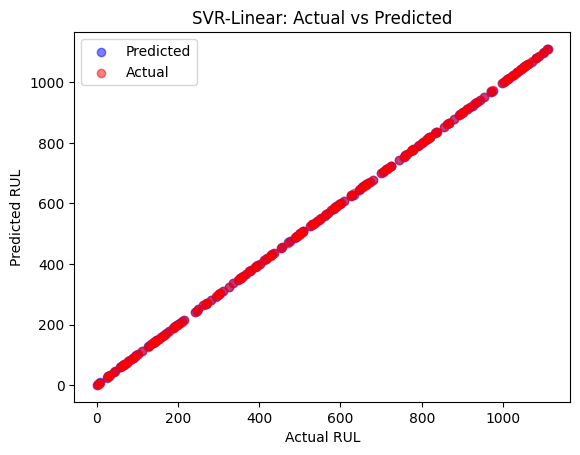

In [34]:
# Actual vs Predicted graph with separate colors
plt.scatter(y_test, predict_linear, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')
plt.title('SVR-Linear: Actual vs Predicted')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()

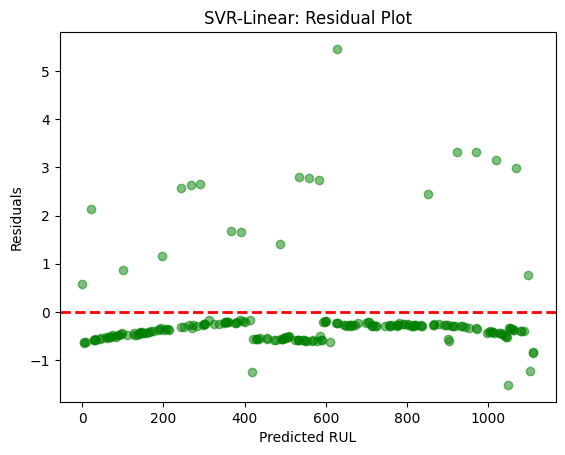

In [35]:
# Residual plot for SVR - Linear
residuals_linear = y_test - predict_linear
plt.scatter(predict_linear, residuals_linear, color='green', alpha=0.5)
plt.title('SVR-Linear: Residual Plot')
plt.xlabel('Predicted RUL')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.show()

In [36]:
# Learning curve for SVR - Linear
train_sizes, train_scores, test_scores = learning_curve(model_linear, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse_mean = -np.mean(train_scores, axis=1)
test_mse_mean = -np.mean(test_scores, axis=1)

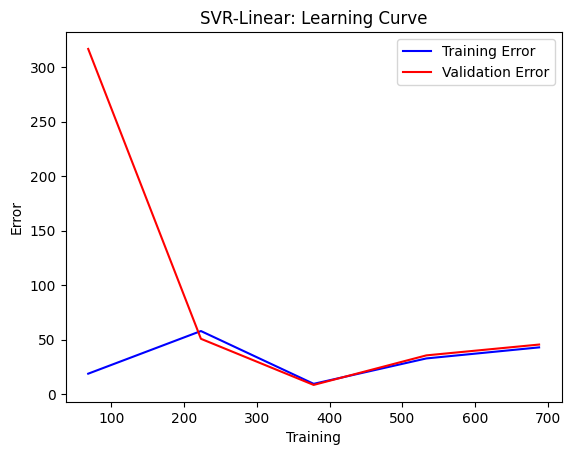

In [37]:
plt.plot(train_sizes, train_mse_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mse_mean, label='Validation Error', color='red')
plt.title('SVR-Linear: Learning Curve')
plt.xlabel('Training')
plt.ylabel('Error')
plt.legend()
plt.show()

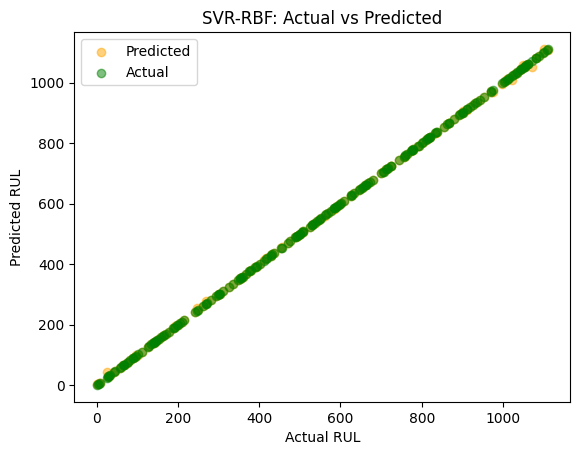

In [38]:
# Actual vs Predicted graph
plt.scatter(y_test, predict_rbf, color='orange', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual')
plt.title('SVR-RBF: Actual vs Predicted')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()

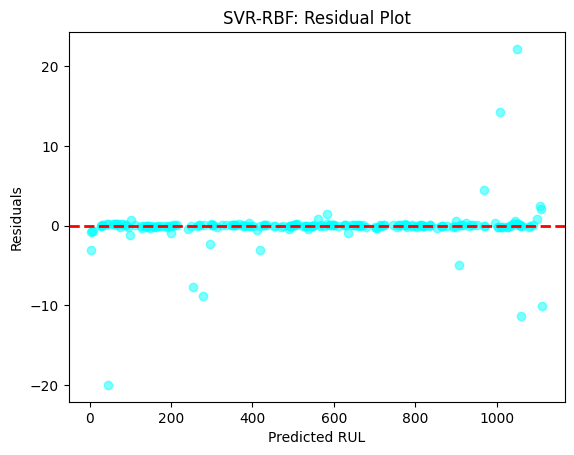

In [39]:
# Residual plot
residuals_rbf = y_test - predict_rbf
plt.scatter(predict_rbf, residuals_rbf, color='cyan', alpha=0.5)
plt.title('SVR-RBF: Residual Plot')
plt.xlabel('Predicted RUL')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.show()

In [40]:
# Use a smaller subset of data
subset_size = 1000  # Adjust this value based on your needs
x_train_subset = x_train_scaled[:subset_size]
y_train_subset = y_train[:subset_size]

In [41]:
# Learning curve with further reduced training examples and shuffling
train_sizes_rbf, train_scores_rbf, test_scores_rbf = learning_curve(
    model_rbf, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, n_jobs=-1
)

In [42]:
train_mse_mean_rbf = -np.mean(train_scores_rbf, axis=1)
test_mse_mean_rbf = -np.mean(test_scores_rbf, axis=1)

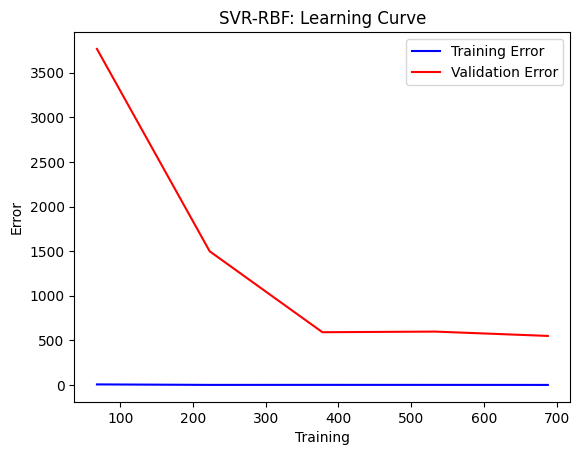

In [43]:
plt.plot(train_sizes_rbf, train_mse_mean_rbf, label='Training Error', color='blue')
plt.plot(train_sizes_rbf, test_mse_mean_rbf, label='Validation Error', color='red')
plt.title('SVR-RBF: Learning Curve')
plt.xlabel('Training')
plt.ylabel('Error')
plt.legend()
plt.show()

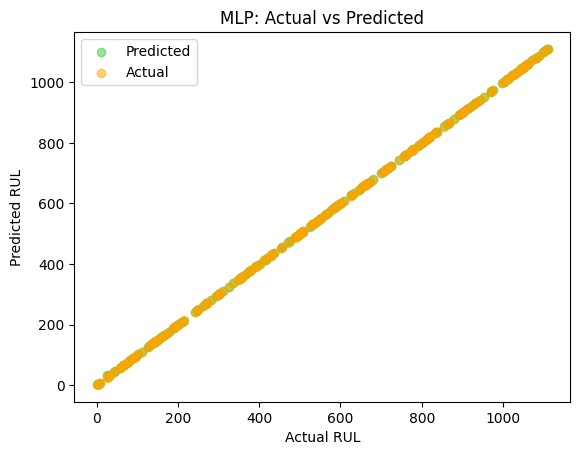

In [44]:
# Actual vs Predicted graph
plt.scatter(y_test, mlp_predict, color='Limegreen', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='orange', alpha=0.5, label='Actual')
plt.title('MLP: Actual vs Predicted')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()

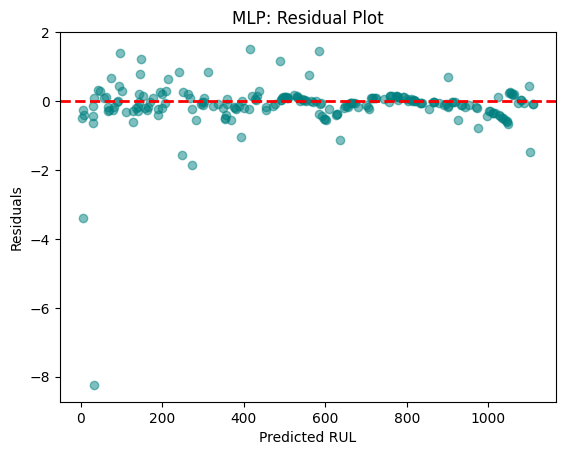

In [45]:
# Residual plot
residuals_mlp = y_test - mlp_predict
plt.scatter(mlp_predict, residuals_mlp, color='teal', alpha=0.5)
plt.title('MLP: Residual Plot')
plt.xlabel('Predicted RUL')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.show()

In [46]:
# Learning curve
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(mlp_model, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse_mean_mlp = -np.mean(train_scores_mlp, axis=1)
test_mse_mean_mlp = -np.mean(test_scores_mlp, axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perce

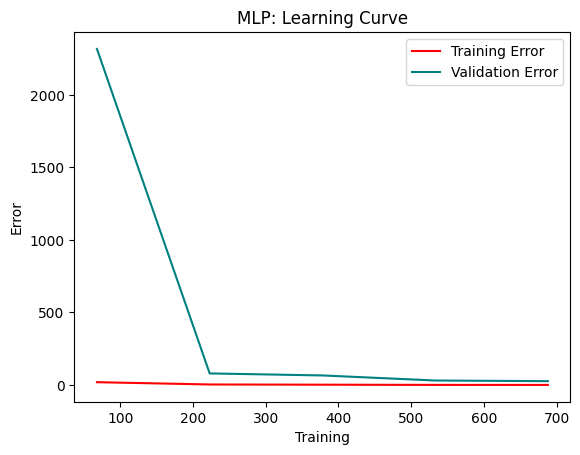

In [47]:
plt.plot(train_sizes_mlp, train_mse_mean_mlp, label='Training Error', color='red')
plt.plot(train_sizes_mlp, test_mse_mean_mlp, label='Validation Error', color='teal')
plt.title('MLP: Learning Curve')
plt.xlabel('Training')
plt.ylabel('Error')
plt.legend()
plt.show()

In [48]:
# Model labels
models = ['SVR-Linear', 'SVR-RBF', 'MLP']

In [49]:
# RMSE values
rmse_values = [linear_rmse, rbf_rmse, mlp_rmse]

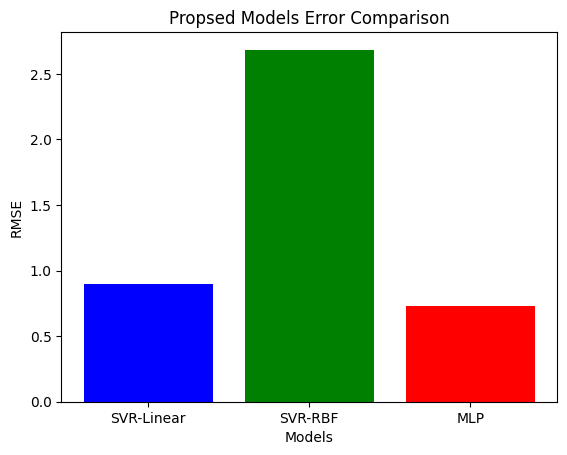

In [50]:
# Create a bar graph
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel( 'RMSE')
plt.title('Propsed Models Error Comparison')
plt.show()

In [51]:
# Create a DataFrame for results
results = pd.DataFrame({
    'Model': ['SVR-Linear','SVR-RBF', 'MLP'],
    'MAE':[linear_mae, rbf_mae, mlp_mae],
    'MSE': [linear_mse, rbf_mse, mlp_mse],
    'RMSE': [linear_rmse, rbf_rmse, mlp_rmse],
    'NRMSE': [linear_rmse_scaled, rbf_rmse_scaled, mlp_rmse_scaled],
    'R2 Score': [linear_r2, rbf_r2, mlp_r2]
})

# Display the results
print(results)

        Model       MAE       MSE      RMSE     NRMSE  R2 Score
0  SVR-Linear  0.583109  0.805096  0.897272  0.000807  0.999992
1     SVR-RBF  0.674231  7.206922  2.684571  0.002414  0.999933
2         MLP  0.315209  0.533171  0.730186  0.000657  0.999995
